In [13]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import random
import matplotlib.pyplot as plt

In [14]:
# PINN model
class unsteady_PINN(nn.Module):
    def __init__(self):
        super(unsteady_PINN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(3, 64), nn.Tanh(),
            nn.Linear(64, 64), nn.Tanh(),
            nn.Linear(64, 64), nn.Tanh(),
            nn.Linear(64, 64), nn.Tanh(),
            nn.Linear(64, 64), nn.Tanh(),
            nn.Linear(64, 64), nn.Tanh(),
            nn.Linear(64, 3)
        )

    def forward(self, x, y, t):
        input_data = torch.stack([x.view(-1), y.view(-1), t.view(-1)], dim=1)
        return self.model(input_data)


# PINN model
class steady_PINN(nn.Module):
    def __init__(self):
        super(steady_PINN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 64), nn.Tanh(),
            nn.Linear(64, 64), nn.Tanh(),
            nn.Linear(64, 64), nn.Tanh(),
            nn.Linear(64, 64), nn.Tanh(),
            nn.Linear(64, 64), nn.Tanh(),
            nn.Linear(64, 64), nn.Tanh(),
            nn.Linear(64, 3)
        )

    def forward(self, x, y):
        input_data = torch.stack([x.view(-1), y.view(-1)], dim=1)
        return self.model(input_data)


In [15]:
# 모델 생성 및 학습 
model = unsteady_PINN().cuda()
model.load_state_dict(torch.load("model/test_current_min1.pt"))

<All keys matched successfully>

In [16]:
x_initial = np.linspace(0, 2.2, 440).reshape(-1, 1)
y_initial = np.linspace(0, 0.41, 82).reshape(-1, 1)
x_initial, y_initial = np.meshgrid(x_initial, y_initial)
x_initial_tensor = torch.tensor(x_initial, device="cuda", dtype=torch.float32)
y_initial_tensor = torch.tensor(y_initial, device="cuda", dtype=torch.float32)

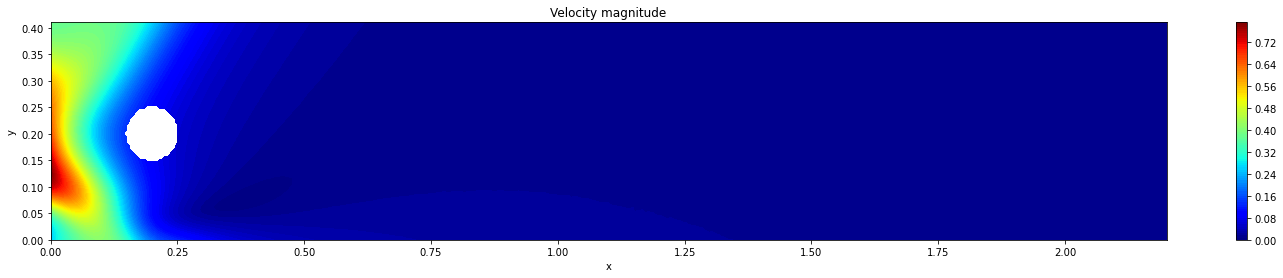

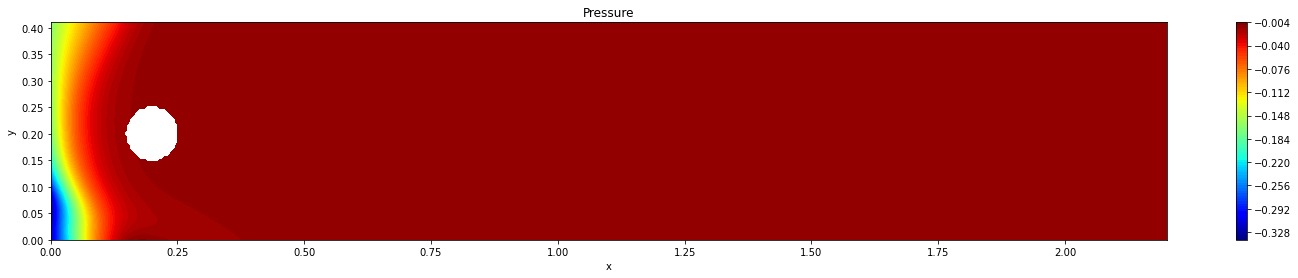

In [17]:
time = 0

u = model(x_initial_tensor, y_initial_tensor, torch.full_like(x_initial_tensor, time))[:,0].detach().cpu().numpy()
v = model(x_initial_tensor, y_initial_tensor, torch.full_like(x_initial_tensor, time))[:,1].detach().cpu().numpy()
p = model(x_initial_tensor, y_initial_tensor, torch.full_like(x_initial_tensor, time))[:,2].detach().cpu().numpy()
vel = (u*u+v*v)**(1/2)


# 구멍을 뚫은 부분 제외한 데이터 마스킹
cylinder_mask = (x_initial-0.2)**2 + (y_initial-0.2)**2 > 0.05**2


# 속도(velocity) 데이터에 대한 등고선 그래프 그리기
fig, ax = plt.subplots(figsize=(25, 4))
masked_vel = np.where(cylinder_mask, vel.reshape(82,440), np.nan)
contourf = ax.contourf(x_initial, y_initial, masked_vel, cmap='jet', levels=101)#, vmin=0, vmax=2.0)
colorbar = plt.colorbar(contourf, ax=ax)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Velocity magnitude')
# plt.savefig("image/Cylinder_Re100_velocity.png")
plt.show()

# 그래프 생성
fig, ax = plt.subplots(figsize=(25, 4))
masked_p = np.where(cylinder_mask, p.reshape(82,440), np.nan)
colorbar = ax.contourf(x_initial, y_initial, masked_p, cmap='jet', levels=101)
colorbar = plt.colorbar(colorbar, ax=ax)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Pressure')
# plt.savefig("image/Cylinder_Re100_pressure.png")
plt.show()

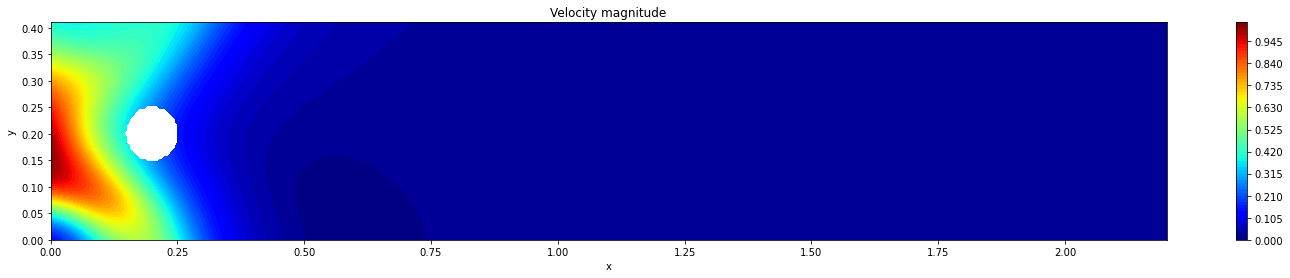

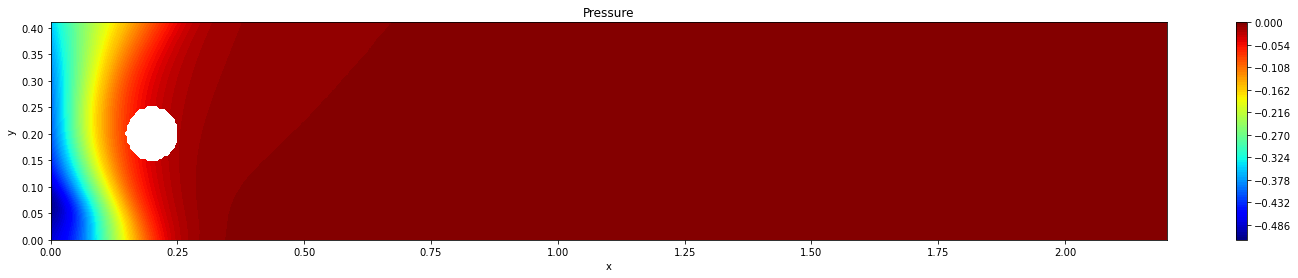

In [18]:
time = 10

u = model(x_initial_tensor, y_initial_tensor, torch.full_like(x_initial_tensor, time))[:,0].detach().cpu().numpy()
v = model(x_initial_tensor, y_initial_tensor, torch.full_like(x_initial_tensor, time))[:,1].detach().cpu().numpy()
p = model(x_initial_tensor, y_initial_tensor, torch.full_like(x_initial_tensor, time))[:,2].detach().cpu().numpy()
vel = (u*u+v*v)**(1/2)


# 구멍을 뚫은 부분 제외한 데이터 마스킹
cylinder_mask = (x_initial-0.2)**2 + (y_initial-0.2)**2 > 0.05**2


# 속도(velocity) 데이터에 대한 등고선 그래프 그리기
fig, ax = plt.subplots(figsize=(25, 4))
masked_vel = np.where(cylinder_mask, vel.reshape(82,440), np.nan)
contourf = ax.contourf(x_initial, y_initial, masked_vel, cmap='jet', levels=101)#, vmin=0, vmax=1.4)
colorbar = plt.colorbar(contourf, ax=ax) 
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Velocity magnitude')
# plt.savefig("image/Cylinder_Re100_velocity.png")
plt.show()

# 그래프 생성
fig, ax = plt.subplots(figsize=(25, 4))
masked_p = np.where(cylinder_mask, p.reshape(82,440), np.nan)
scatter = ax.contourf(x_initial, y_initial, masked_p, cmap='jet', levels=101)
colorbar = plt.colorbar(scatter, ax=ax)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Pressure')
# plt.savefig("image/Cylinder_Re100_pressure.png")
plt.show()